Ingresa la secuencia binaria (ej. 1011001): 000000000000011111
¿Tipo de violación en HDB3? (positiva/negativa): negativa


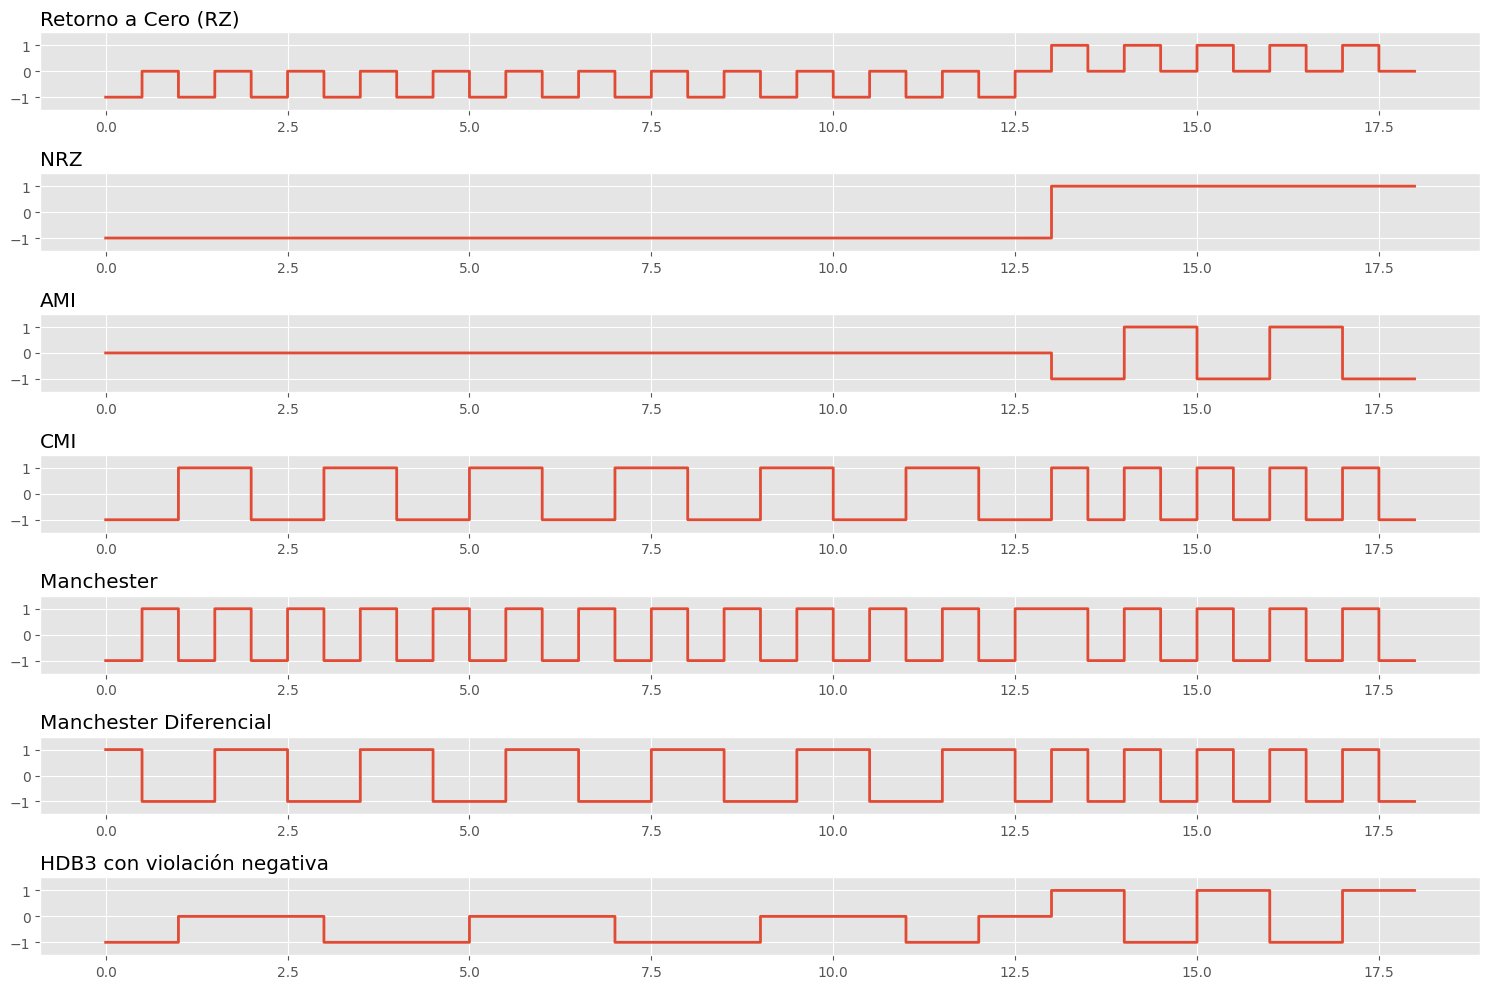

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Configuración inicial
style.use('ggplot')
plt.figure(figsize=(15, 10))

# Entrada del usuario
binary_input = input("Ingresa la secuencia binaria (ej. 1011001): ")
violation_type = input("¿Tipo de violación en HDB3? (positiva/negativa): ").lower()

binary_sequence = [int(bit) for bit in binary_input]

# Parámetros
bit_duration = 1
samples_per_bit = 100
total_time = len(binary_sequence) * bit_duration
t = np.linspace(0, total_time, len(binary_sequence) * samples_per_bit, endpoint=False)

def nrz_code(sequence):
    signal = np.zeros(len(sequence) * samples_per_bit)
    for i, bit in enumerate(sequence):
        signal[i*samples_per_bit:(i+1)*samples_per_bit] = bit if bit else -1
    return signal

def rz_code(sequence):
    signal = np.zeros(len(sequence) * samples_per_bit)
    for i, bit in enumerate(sequence):
        half = samples_per_bit // 2
        signal[i*samples_per_bit:i*samples_per_bit+half] = 1 if bit else -1
    return signal

def ami_code(sequence):
    signal = np.zeros(len(sequence) * samples_per_bit)
    polarity = 1
    for i, bit in enumerate(sequence):
        if bit:
            polarity *= -1
            signal[i*samples_per_bit:(i+1)*samples_per_bit] = polarity
    return signal

def manchester_code(sequence):
    signal = np.zeros(len(sequence) * samples_per_bit)
    half = samples_per_bit // 2
    for i, bit in enumerate(sequence):
        if bit:
            signal[i*samples_per_bit:i*samples_per_bit+half] = 1
            signal[i*samples_per_bit+half:(i+1)*samples_per_bit] = -1
        else:
            signal[i*samples_per_bit:i*samples_per_bit+half] = -1
            signal[i*samples_per_bit+half:(i+1)*samples_per_bit] = 1
    return signal

def diff_manchester_code(sequence):
    signal = np.zeros(len(sequence) * samples_per_bit)
    half = samples_per_bit // 2
    last = 1
    for i, bit in enumerate(sequence):
        if bit:
            last *= -1
            signal[i*samples_per_bit:i*samples_per_bit+half] = last
            last *= -1
            signal[i*samples_per_bit+half:(i+1)*samples_per_bit] = last
        else:
            signal[i*samples_per_bit:i*samples_per_bit+half] = last
            last *= -1
            signal[i*samples_per_bit+half:(i+1)*samples_per_bit] = last
    return signal

def cmi_code(sequence):
    signal = np.zeros(len(sequence) * samples_per_bit)
    half = samples_per_bit // 2
    alt = 1
    for i, bit in enumerate(sequence):
        if bit:
            signal[i*samples_per_bit:i*samples_per_bit+half] = 1
            signal[i*samples_per_bit+half:(i+1)*samples_per_bit] = -1
        else:
            alt *= -1
            signal[i*samples_per_bit:(i+1)*samples_per_bit] = alt
    return signal

def hdb3_code(sequence):
    signal = np.zeros(len(sequence) * samples_per_bit)
    polarity = 1 if violation_type == 'positiva' else -1
    last_pulse = -polarity
    zero_count = 0
    pulse_count = 0

    i = 0
    while i < len(sequence):
        if sequence[i] == 1:
            pulse = -last_pulse
            signal[i*samples_per_bit:(i+1)*samples_per_bit] = pulse
            last_pulse = pulse
            pulse_count += 1
            zero_count = 0
            i += 1
        else:
            zero_count += 1
            if zero_count == 4:
                # Inserta sustitución B00V
                if pulse_count % 2 == 0:
                    # Sustitución 000V
                    signal[(i-3)*samples_per_bit:(i-2)*samples_per_bit] = polarity
                    signal[i*samples_per_bit:(i+1)*samples_per_bit] = polarity
                    last_pulse = polarity
                else:
                    # Sustitución B00V
                    signal[(i-3)*samples_per_bit:(i-2)*samples_per_bit] = -last_pulse
                    signal[i*samples_per_bit:(i+1)*samples_per_bit] = last_pulse
                zero_count = 0
                pulse_count += 2
                i += 1
            else:
                i += 1
    return signal

# Generar todas las señales
signals = {
    "Retorno a Cero (RZ)": rz_code(binary_sequence),
    "NRZ": nrz_code(binary_sequence),
    "AMI": ami_code(binary_sequence),
    "CMI": cmi_code(binary_sequence),
    "Manchester": manchester_code(binary_sequence),
    "Manchester Diferencial": diff_manchester_code(binary_sequence),
    "HDB3 con violación " + violation_type: hdb3_code(binary_sequence)
}

# Graficar
for idx, (title, signal) in enumerate(signals.items(), 1):
    plt.subplot(len(signals), 1, idx)
    plt.step(t, signal, where='post', linewidth=2)
    plt.title(title, loc='left')
    plt.ylim(-1.5, 1.5)
    plt.yticks([-1, 0, 1])
    plt.grid(True)

plt.tight_layout()
plt.show()
